<a href="https://colab.research.google.com/github/dagoe/hello-world/blob/master/StatistikMitMatplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deskriptive Statistik mit matplotlib

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

## Simulation von Daten
Wir erzeugen künstliche Beobachtungen des Intelligenzquotienten. Per **Definition** ist der IQ normalverteilt mit Erwartungswert 100 und Standardabweichung 15.

In [0]:
N = 300 # Anzahl der simulierten Beobachtungen
x = 100 + 15*np.random.randn(N)

# Statistiken

In [0]:
meanX = np.mean(x) 
stdX = np.std(x)
medianX = np.median(x)
iqrX = np.percentile(x, 75) - np.percentile(x, 25)
print("Mittelwert = {0:.2f}, Standardabweichung = {1:10.2f}\nMedian = {2}, Interquartilsabstand = {3:.2e}\n"
      .format(meanX, stdX, medianX, iqrX))

Mittelwert = 99.61, Standardabweichung =      14.75
Median = 99.49199114149215, Interquartilsabstand = 1.91e+01



# Histogramm

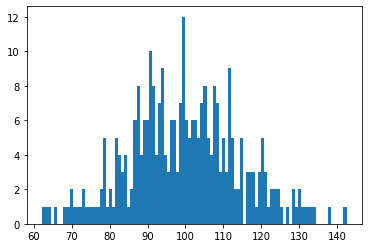

In [0]:
plt.figure()
plt.hist(x,100)
plt.show()

In [0]:
# Wieviele Personen haben einen IQ > 130?
np.sum(x>130)

8

# Empirische Verteilungsfunktion

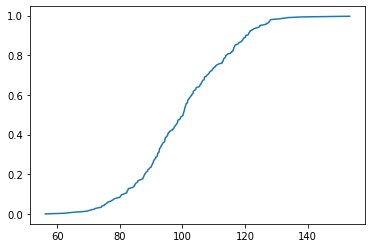

In [0]:
xSorted = np.sort(x)
y = np.arange(len(x))/float(len(x))
plt.figure()
plt.plot(xSorted, y)
plt.show()

# Einteilung in Klassen

In [0]:
y = np.where(x>130, 'A', 'B')
y

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'A',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B

In [0]:
numA = np.sum(y == 'A')
numB = np.sum(y == 'B')
print("{0} Personen sind in Klasse A, {1} Personen sind in Klasse B.".format(numA, numB))

5 Personen sind in Klasse A, 295 Personen sind in Klasse B.


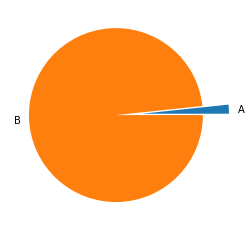

In [0]:
plt.figure()
plt.pie([numA,numB], labels=("A","B"), explode=(0.3, 0))
plt.show()

Mehr Klassen.

In [0]:
condList = [x < 85, np.logical_and(85 <= x, x < 115), x >= 115]
choiceList = ['Lo', 'Norm', 'Hi']
y1 = np.select(condList, choiceList)

In [0]:
list(zip(x, y1))[:5]

[(90.71562747996998, 'Norm'),
 (90.02512755149199, 'Norm'),
 (97.34834452210474, 'Norm'),
 (116.68417085544966, 'Hi'),
 (92.13424538831359, 'Norm')]

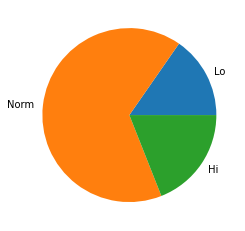

[46, 197, 57]

In [0]:
clSize = [np.sum(y1 == lbl) for lbl in choiceList]
plt.figure()
plt.pie(clSize, labels=choiceList)
plt.show()
clSize

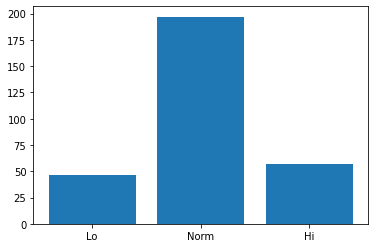

In [0]:
plt.figure()
plt.bar(choiceList, clSize)
plt.show()

# Einfache und geschichtete Zufallsstichproben

## Synthetische Daten

In [0]:
# A: Adlige, B: Bauern
NumA = 1000
NumB = 10000 - NumA
mittleres_Einkommen_A = 100000
mittleres_Einkommen_B = 10000
std_A = 10000 * 0.1
std_B = 1000 * 0.1
# Ziehe normalverteilte Einkommen aus diesen Gruppen
A = mittleres_Einkommen_A + std_A*np.random.randn(NumA)
B = mittleres_Einkommen_B + std_B*np.random.randn(NumB)
Population = np.concatenate([A, B])
mittleres_Einkommen_Population = np.mean(Population)
median_Einkommen_Population = np.median(Population)
print(f"mittleres Einkommen Population = {mittleres_Einkommen_Population}")
print(f"Median Einkommen Population = {median_Einkommen_Population}")

mittleres Einkommen Population = 19005.760720472168
Median Einkommen Population = 10014.980980349254


## Einkommensverteilung

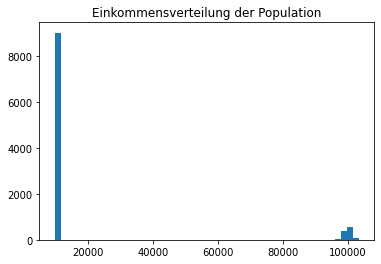

In [0]:
plt.figure()
plt.title("Einkommensverteilung der Population")
plt.hist(Population,50)
plt.show()

## Simulation von vielen unabhängigen Zufallsstichproben
Jede Stichprobe umfasst 1% der Population. Geschätzt werden soll das mittlere Einkommen.

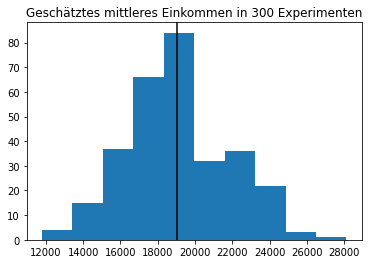

In [0]:
N = 300
mittleresEinkommen = np.zeros(N) + np.nan
stichprobenumfang = 100
for k in range(N):
    # Ziehe ohne Zuruecklegen
    stichprobe = np.random.choice(Population, size=stichprobenumfang, replace=False)
    mittleresEinkommen[k] = np.mean(stichprobe)
plt.figure()
plt.title(f"Geschätztes mittleres Einkommen in {N} Experimenten")
plt.hist(mittleresEinkommen)
plt.axvline(x=mittleres_Einkommen_Population, color='k')
plt.show()

## Simulation von vielen geschichteten Zufallsstichproben
Wiederum mit jeweils 1% der Population.

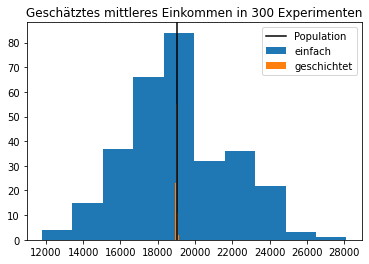

In [0]:
mittleresEinkommen_S = np.zeros(N) + np.nan
stichprobenumfang = 100
anteilA = NumA/(NumA + NumB)
anteilB = NumB/(NumA + NumB)
stichprobenumfangB = np.int(anteilB*stichprobenumfang)
stichprobenumfangA = stichprobenumfang - stichprobenumfangB
for k in range(N):
    # Ziehe ohne Zuruecklegen aus A
    stichprobeA = np.random.choice(A, size=stichprobenumfangA, replace=False)
    # Ziehe ohne Zuruecklegen aus B
    stichprobeB = np.random.choice(B, size=stichprobenumfangB, replace=False)
    # Gesamte Stichprobe
    stichprobe = np.concatenate([stichprobeA, stichprobeB])
    mittleresEinkommen_S[k] = np.mean(stichprobe)
plt.figure()
plt.title(f"Geschätztes mittleres Einkommen in {N} Experimenten")
plt.hist(mittleresEinkommen, label="einfach")
plt.hist(mittleresEinkommen_S, label="geschichtet")
plt.axvline(x=mittleres_Einkommen_Population, color='k', label="Population")
plt.legend()
plt.show()

In [0]:
mittleresEinkommen_S

array([18969.05178284, 19040.95083527, 18973.75001918, 18971.15631165,
       18989.68712023, 18947.98246037, 18937.81067525, 19023.70938084,
       18993.19063721, 18962.05746638, 19020.79456911, 19023.96081276,
       19020.68330456, 18981.69053444, 19025.80965301, 18963.27484203,
       19023.05395377, 19006.15923614, 19027.54455438, 18977.03298521,
       18962.39505768, 18991.84642282, 19025.31040532, 18989.57487716,
       19000.81904993, 18970.15800521, 19004.19660059, 18987.19008811,
       19003.85958247, 18996.65753772, 19023.24327788, 18981.44628889,
       18964.88301477, 18965.34096586, 19039.0376341 , 18944.16587243,
       18964.5877262 , 18967.8470972 , 18972.93159036, 19019.96427103,
       18987.26253733, 19016.43579205, 18963.37206026, 19073.31807006,
       19000.61626715, 18967.51356743, 19059.71210035, 19003.69122597,
       19030.17593522, 18984.44957949, 18944.95386414, 18997.67119339,
       18981.19179467, 19012.64437804, 18959.4082376 , 19041.865369  ,
      